<a href="https://colab.research.google.com/github/DoctorDroid/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
import pandas as pd

In [0]:
# assign url to vaiable
source_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

In [0]:
# read in that URL as a dataset
iowa = pd.read_csv(source_url)

In [0]:
# first few rows
iowa.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
# get shape
iowa.shape

(1460, 81)

In [0]:
# describe
iowa.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
#describe partial
iowa[['YearBuilt','MSSubClass']].describe()

,YearBuilt,MSSubClass
count,1460.000000,1460.000000
mean,1971.267808,56.897260
std,30.202904,42.300571
min,1872.000000,20.000000
25%,1954.000000,20.000000
50%,1973.000000,50.000000
75%,2000.000000,70.000000
max,2010.000000,190.000000


In [0]:
# column types
pd.set_option('display.max_rows', 100)
iowa.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [0]:
#less (slice)
iowa.dtypes[2:7]

MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
dtype: object

In [0]:
# check type on single element by Coulumn name
iowa['BedroomAbvGr'].dtype

dtype('int64')

In [0]:
# dot notation works too but not with spaces in column names (features) or with multiple column calls
iowa.Fireplaces.sample(4)

428     0
91      0
990     1
1261    0
Name: Fireplaces, dtype: int64

In [0]:
iowa[['Fireplaces', 'BedroomAbvGr']].sample(4)

,Fireplaces,BedroomAbvGr
1361,1,3
273,1,3
554,1,3
191,0,4


In [0]:
iowa['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [0]:
import numpy as np

In [0]:
# NaN is a float (for some reason)
type(np.nan)

float

In [0]:
# count the NaNs (same as value counts if you don't want to run with dropna=False)
iowa['LotFrontage'].isnull().sum()


259

In [0]:
# checking shape before and after dropna
iowa.shape

(1460, 81)

In [0]:
iowa.dropna(subset=['LotFrontage'],inplace = True)

In [0]:
iowa['LotFrontage'].isnull().sum()

0

In [0]:
dropped_iowa = iowa.copy()
dropped_iowa.shape 

(1201, 81)

In [0]:
#revert dataframe for comparison
iowa = pd.read_csv(source_url)

In [0]:
small=iowa[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy() 
#the copy() assures that changes made on the new 'small' dataset do not copy over the elements in the original
small.sample(3)

NameError: ignored

In [0]:
# Adding SF colums together in a new "feature" or column named TotalSF
small['TotalSF'] = small['TotalBsmtSF'] + small['1stFlrSF'] + small['2ndFlrSF']
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [0]:
# Dividing Price by Total Square Footage give us Price per square foot.
#New colum will create and display all new values 
small['PricePerSF'] = small['SalePrice'] / small['TotalSF']
small.sample(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSF
607,896,1112,896,225000,2904,77.479339
558,729,729,717,175000,2175,80.459770
1098,672,757,567,128000,1996,64.128257
1120,1012,1012,0,118400,2024,58.498024
1123,698,698,0,118000,1396,84.527221


In [0]:
#to work with categorical elements only
#here are a few categorical colums from 'iowa'
iowa[['LotShape', 'Alley', 'Street', 'SaleCondition']].head()

,LotShape,Alley,Street,SaleCondition
0,Reg,NaN,Pave,Normal
1,Reg,NaN,Pave,Normal
2,IR1,NaN,Pave,Normal
3,IR1,NaN,Pave,Abnorml
4,IR1,NaN,Pave,Normal


In [0]:
#now I'll condense Sale conditions into two just 2 categories in a new column.
#  Normal and otherwise
iowa['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [0]:
iowa['NormalCondition'] = np.where(iowa['SaleCondition']=='Normal', 'Yes', 'No')
iowa['NormalCondition'].value_counts()

Yes    1198
No      262
Name: NormalCondition, dtype: int64

In [0]:
#using .map
iowa['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:

iowa['LotShape3'] = iowa['LotShape'].map({'Reg':'Regular',
                                          'IR1':'Irregular',
                                          'IR2':'Other','IR3':'Other'})
iowa['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [0]:
# using .loc to divide Neighborhoods 
# that have the most entrys into 1 
# category and the rest into another
iowa['Neighborhood'].value_counts().head()
#gets the top hoods

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: Neighborhood, dtype: int64

In [0]:
iowa['top_neighbors']='All Others' #creates and 'formats' all to the default
# df.loc[condition,feature] = value
iowa.loc[iowa['Neighborhood']=="NAmes", 'top_neighbors'] = 'North Ames'
iowa.loc[iowa['Neighborhood']=='CollgCr', 'top_neighbors']='College Circle'
iowa.loc[iowa['Neighborhood']=='Gilbert', 'top_neighbors']='Favorite Neighborhood'
iowa.loc[iowa['Neighborhood'] == 'Somerst', 'top_neighbors'] = 'Popular with Professionals'
iowa[['top_neighbors','Neighborhood']].tail(10)

,top_neighbors,Neighborhood
1450,North Ames,NAmes
1451,Popular with Professionals,Somerst
1452,All Others,Edwards
1453,All Others,Mitchel
1454,Popular with Professionals,Somerst
1455,Favorite Neighborhood,Gilbert
1456,All Others,NWAmes
1457,All Others,Crawfor
1458,North Ames,NAmes
1459,All Others,Edwards


In [0]:
# to see the counts of the new elements
iowa['top_neighbors'].value_counts()

All Others                    920
North Ames                    225
College Circle                150
Popular with Professionals     86
Favorite Neighborhood          79
Name: top_neighbors, dtype: int64

In [0]:
# crosstab
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,294,23,603
College Circle,53,11,86
Favorite Neighborhood,53,11,15
North Ames,66,2,157
Popular with Professionals,18,4,64


In [0]:
# margins show column and row totals in new c/r's both labeled "All"
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,294,23,603,920
College Circle,53,11,86,150
Favorite Neighborhood,53,11,15,79
North Ames,66,2,157,225
Popular with Professionals,18,4,64,86
All,484,51,925,1460


In [0]:
# as proportions Normalize allows you to select whether totaling in the 
# margins by row (index) or by feature (column)
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize='index', margins=True)


LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,0.319565,0.025000,0.655435
College Circle,0.353333,0.073333,0.573333
Favorite Neighborhood,0.670886,0.139241,0.189873
North Ames,0.293333,0.008889,0.697778
Popular with Professionals,0.209302,0.046512,0.744186
All,0.331507,0.034932,0.633562


In [0]:
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize='columns', margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,0.607438,0.450980,0.651892,0.630137
College Circle,0.109504,0.215686,0.092973,0.102740
Favorite Neighborhood,0.109504,0.215686,0.016216,0.054110
North Ames,0.136364,0.039216,0.169730,0.154110
Popular with Professionals,0.037190,0.078431,0.069189,0.058904


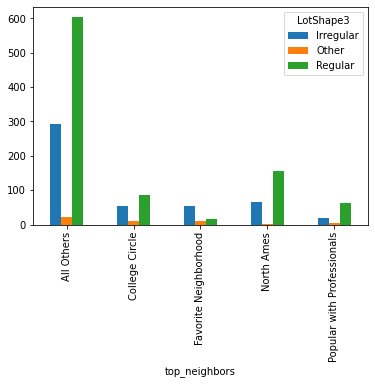

In [0]:
# now visualize the crostab
myresults = pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])
myresults.plot(kind='bar');

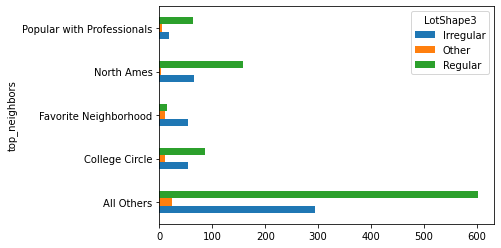

In [0]:
#this would look better if we could swap the x and y
#luckily we can by changing the kind to barh (horizontal)
myresults.plot(kind = 'barh')

In [0]:
#moving on to a new data set using !wget and !unzip
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip


--2020-05-11 02:16:27--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 52.26.240.115, 54.71.0.232, 50.112.20.251
Connecting to resources.lendingclub.com (resources.lendingclub.com)|52.26.240.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [           <=>      ]  22.05M  1.92MB/s    in 12s     

2020-05-11 02:16:39 (1.91 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23121687]



In [0]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [0]:
loans = pd.read_csv('LoanStats_2018Q4.csv')
loans.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant       2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid  n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100            80   

In [0]:
loans.tail()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 5000  5000  5000   36 months  13.56% 169.83 C   C1  Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current n   NaN NaN debt_consolidation Debt consolidation      381xx TN  11.3  1   Jun-2006 0   21.0 NaN 9   0   2597 27.3% 15  f   2751.79 2751.79 3053.17 3053.17 2248.21 804.96  0.0 0.0 0.0 Apr-2020 169.83 May-2020 Apr-2020 0   NaN  1   Individual NaN NaN NaN 0   1413 69785 0   2   0   1   16.0 2379    40.0  3   4   1826 32.0 9500  0   0   1   5   8723   1174.0  60.9 0   0   147.0 85  9   9   2   10.0  21.0 9.0 21.0 0   1   3   2   2   6   6   7   3   9   0.0 0   0   3   92.9 50.0 0   0   93908   4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     10000 10000 9750   36 months  11.06% 327.68 B   B3  NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current n   NaN NaN credit_card        Credit card refinancing 980xx WA  11.78 0   Oct-2008 2   40.0 NaN 15  0   6269 13.1% 25  f   5411.74 5276.45 5882.88 5735.81 4588.26 1294.62 0.0 0.0 0.0 Apr-2020 327.68 May-2020 Apr-2020 0   53.0 1   Individual NaN NaN NaN 0   520  16440 3   1   1   1   2.0  10171   100.0 2   5   404  28.0 47700 0   3   5   6   1265.0 20037.0 2.3  0   0   61.0  119 1   1   0   1.0   NaN  1.0 40.0 1   2   4   6   8   3   14  22  4   15  0.0 0   0   3   92.0 0.0  0   0   57871.0 16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                                 10000  36 months  16.91% 356.08 C   C5  Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current n   NaN NaN other              Other                   021xx MA  17.72 1   Sep-2006 0   14.0 NaN 17  0   1942 30.8% 31  w   5626.39 5626.39 6400.05 6400.05 4373.61 2026.44 0.0 0.0 0.0 Apr-2020 356.08 May-2020 Apr-2020 0   25.0 1   Individual NaN NaN NaN 0   0    59194 0   15  1   1   12.0 57252.0 85.0  0   0   1942 80.0 6300  0   5   0   1   3482   2058.0  48.5 0   0   144.0 142 40  12  0   131.0 30.0 NaN 30.0 3   1   1   1   5   22  2   9   1   17  0.0 0   0   1   74.2 0.0  0   0   73669   59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2050909275 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN  NaN   NaN NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN NaN NaN NaN      NaN    NaN      NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN   NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN    NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN     NaN   NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 820109297  NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN N

In [0]:
#this is ugly.. let's chop it down to something cleaner

In [0]:
# We can fix the header problem by reading in the df using
#  'skipfooter' parameter and setting the header to the first row of data
loans = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2)
loans.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
loans.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5411.74,5276.45,5882.88,5735.81,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5626.39,5626.39,6400.05,6400.05,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#much better.

In [0]:
loans.shape

(128412, 144)

In [0]:
pd.set_option('display.max_rows', loans.shape[1])
loans.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
settlement_percentage                         127661
settlement_term                               127661
settlement_date                               127661
debt_settlement_flag_date                     127661
settlement_status                             127661
settlement_amount                             127661
sec_app_mths_since_last_major_derog           123258
hardship_loan_status                          117705
hardship_status                               117691
hardship_reason                               117691
hardship_dpd                                  117690
hardship_length                               117690
payment_plan_start_date                       117690
hardship_end_date                             117690
hardship_start_date                           

In [0]:
# drop an entire column
loans.drop('url',axis=1, inplace=True)

In [0]:
# Look at the first 10 values of the int_rate column
loans['int_rate'].head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     12.98%
8     10.33%
9     23.40%
Name: int_rate, dtype: object

In [0]:
# Look at a specific value from the int_rate 
# column this one shows the fourth row
loans['int_rate'][3]

' 14.47%'

In [0]:
print(type(loans['int_rate'][3]))

<class 'str'>


In [0]:
ir = ' 14.47%'
ir.strip()

'14.47%'

In [0]:
ir.strip('%')

' 14.47'

In [0]:
#for both at once

In [0]:
ir.strip().strip('%')

'14.47'

In [0]:
# this is a string, make it a float
float(int_rate.strip().strip('%'))

14.47

In [0]:
type(float(int_rate.strip().strip('%')))

float

In [0]:
#create a funtion that does all these steps at once and run it on the df
def myfunc(my_input_value):
    return float(my_input_value.strip().strip('%'))
new_list=[]
for cell in loans['int_rate']:
  new_list.append(myfunc(cell))
new_list[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 12.98, 10.33, 23.4]

In [0]:
list(loans['int_rate'][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%']

In [0]:
#values match, now to add them to our df
loans['int_rate_clean']=pd.Series(new_list)
loans[['int_rate_clean', 'int_rate']]

,int_rate_clean,int_rate
0,16.14,16.14%
1,11.80,11.80%
2,11.31,11.31%
3,14.47,14.47%
4,27.27,27.27%
...,...,...
128407,15.02,15.02%
128408,15.02,15.02%
128409,13.56,13.56%
128410,11.06,11.06%


In [0]:
#quadruple check the work (like I don't have anything else to do lol)
loans['int_rate_clean'].dtype

dtype('float64')

In [0]:
# this is much cleaner and quicker than all of that, 
# but now I fully understand it...Yay.
loans['int_rate_clean2'] = loans['int_rate'].apply(myfunc)

In [0]:
loans[['int_rate', 'int_rate_clean', 'int_rate_clean2']].sample(10)

,int_rate,int_rate_clean,int_rate_clean2
48503,23.40%,23.40,23.40
69445,10.08%,10.08,10.08
83272,22.35%,22.35,22.35
78152,10.08%,10.08,10.08
24918,10.72%,10.72,10.72
52195,12.98%,12.98,12.98
82586,10.47%,10.47,10.47
75540,10.08%,10.08,10.08
78462,8.46%,8.46,8.46
87064,11.06%,11.06,11.06


In [0]:
#.unique() and .nunique()
print(len(loans['emp_title'].unique()))
print(loans['emp_title'].nunique())

43893
43892


In [0]:
#apparently .nunique() knows better than to count NaN values. I'm proud of her.

In [0]:
# How many NaNs?
loans['emp_title'].isnull().sum()

20947

In [0]:
examples = ['owner', 'Supervisor', ' Project Manager', np.nan]

In [0]:
#.title() will give a capital for each leading character, .strip() will not remove spaces between words.
' department supervisor '.title().strip()

'Department Supervisor'

In [0]:
# Write a function to clean up the titles.
def clean_title(jobtitle):
  if isinstance(jobtitle, str):
    return (jobtitle.title().strip())
  else:
    return 'Unknown'

In [0]:
#using list comprehension to perform for loops in a single line
[clean_title(jobtitle) for jobtitle in examples]
[mylist.append(clean_title(jobtitle) for jobtitle in examples)]
loans['clean_title'] = loans['emp_title'].apply(clean_title)

In [0]:
loans[['emp_title','clean_title']].sample(20)

,emp_title,clean_title
13252,Respiratory therapist,Respiratory Therapist
89005,Registered Nurse,Registered Nurse
12678,Manager,Manager
36237,machinest,Machinest
48392,Network engineer,Network Engineer
91163,Director of Marketing,Director Of Marketing
81957,IT Security Analyst III,It Security Analyst Iii
74114,Manager,Manager
56378,NaN,Unknown
22439,Data Manager,Data Manager


In [0]:
# list all columns
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_clean',
       'int_rate_clean2', 'clean_title'],
      dtype='object', length=146)

In [0]:
# show one column
loans['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [0]:
# as a for loop:
mylist = []
for col in loans.columns:
  if col.endswith('_d'):
    mylst.append(col)
mylist

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
# as a list comprehension:
my_date_cols = [col for col in loans.columns if col.endswith('_d')]
my_date_cols

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
#using datetime
loans['new_issue_d'] = pd.to_datetime(loans['issue_d'], infer_datetime_format=True)
loans[['issue_d', 'new_issue_d']].head()

,issue_d,new_issue_d
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01


In [0]:
type(loans['new_issue_d'][3])

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
loans['new_issue_d'].head(1).values 
#shows entire 'array' of datetime element with the value and type)

array(['2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
loans['year'] = loans['new_issue_d'].dt.year
loans[['issue_d', 'new_issue_d', 'year']].head()

,issue_d,new_issue_d,year
0,Dec-2018,2018-12-01,2018
1,Dec-2018,2018-12-01,2018
2,Dec-2018,2018-12-01,2018
3,Dec-2018,2018-12-01,2018
4,Dec-2018,2018-12-01,2018


In [0]:
loans['month'] = loans['new_issue_d'].dt.month
loans[['issue_d', 'new_issue_d', 'year', 'month']].head()

,issue_d,new_issue_d,year,month
0,Dec-2018,2018-12-01,2018,12
1,Dec-2018,2018-12-01,2018,12
2,Dec-2018,2018-12-01,2018,12
3,Dec-2018,2018-12-01,2018,12
4,Dec-2018,2018-12-01,2018,12


In [0]:
#type check!
loans['weekday'] = loans['new_issue_d'].dt.weekday
loans[['issue_d','new_issue_d', 'year','month','weekday']].sample(10)

,issue_d,new_issue_d,year,month,weekday
93683,Oct-2018,2018-10-01,2018,10,0
24965,Dec-2018,2018-12-01,2018,12,5
107206,Oct-2018,2018-10-01,2018,10,0
120196,Oct-2018,2018-10-01,2018,10,0
108256,Oct-2018,2018-10-01,2018,10,0
10702,Dec-2018,2018-12-01,2018,12,5
7600,Dec-2018,2018-12-01,2018,12,5
56558,Nov-2018,2018-11-01,2018,11,3
128044,Oct-2018,2018-10-01,2018,10,0
19824,Dec-2018,2018-12-01,2018,12,5


In [0]:
#pulling out the the datetime info and then extracting just the month from it
loans['new_pull'] = pd.to_datetime(loans['last_credit_pull_d'])
loans['month_pull'] = loans['new_pull'].dt.month
#Did it work?
loans[['last_credit_pull_d', 'new_pull', 'month_pull']].head()

,last_credit_pull_d,new_pull,month_pull
0,Dec-2019,2019-12-01,12.0
1,Apr-2020,2020-04-01,4.0
2,Feb-2020,2020-02-01,2.0
3,Apr-2020,2020-04-01,4.0
4,Apr-2020,2020-04-01,4.0


In [0]:
loans['day_diff'] = loans['new_issue_d'] - loans['new_pull']
loans[['last_credit_pull_d','new_issue_d','new_pull','day_diff']].head()

,last_credit_pull_d,new_issue_d,new_pull,day_diff
0,Dec-2019,2018-12-01,2019-12-01,-365 days
1,Apr-2020,2018-12-01,2020-04-01,-487 days
2,Feb-2020,2018-12-01,2020-02-01,-427 days
3,Apr-2020,2018-12-01,2020-04-01,-487 days
4,Apr-2020,2018-12-01,2020-04-01,-487 days


# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz 

--2020-05-11 04:32:47--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.10.134
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.10.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  43.6MB/s    in 5.0s    

2020-05-11 04:32:53 (39.4 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
# %cd instacart_2017_05_01